<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter

In [228]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t', decimal=',', engine='python')

In [229]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [231]:
df.shape

(23699, 22)

### Вывод

В таблице 22 столбца. Тип данных во всех столбцах представлен в методе df.info() (‘int64’, ‘object’, ‘float64’, 'bool').

В названиях колонок нет нарушения стиля. Количество значений в столбцах различается, значит в данных есть пропущенные значения.
В столбцах встречаются явные пропуски. Значение в признаках необходимо привести к строчным символам и привести типы данных к верным значениям. Значение в признаке 'locality_name' для упрощения анализа и устранения дублирующей категоризации необходимо привести к одному слову и лемматизировать.
Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но нужно провести подготовку данных к анализу.

## Предобработка данных

In [232]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


В признаках достаточно много пропусков.

In [233]:
df.duplicated().sum()

0


Явные дубликаты отсутствуют

In [234]:
df[df['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [235]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [236]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Скорее всего значения в булевом признаке 'is_apartment' не заполнены в квартирах, которые не являются аппартаментами. Заполняем пропуски значением 'False'.

In [237]:
df['is_apartment'].fillna('False',inplace=True)
df['is_apartment'].isna().sum()

0

In [322]:
df['rooms'].value_counts()

1     6931
2     6372
3     4312
4      795
5      196
6       64
7       34
8        7
9        3
14       2
10       2
15       1
12       1
19       1
Name: rooms, dtype: int64

In [321]:
df['rooms'].where(df['rooms']>0, 1, inplace=True)
df['rooms'].value_counts().head()

1    6931
2    6372
3    4312
4     795
5     196
Name: rooms, dtype: int64

Квартиры с 0 комнатами скорее всего можно прибавить к однокомнатным квартирам

In [240]:
df['balcony'].value_counts()
df['balcony'].isna().sum()

11519

Скорее всего значения в признаке 'balcony' не заполнены в квартирах без балкона. Заполняем пропуски значением '0'.

In [241]:
df['balcony'].fillna(0, inplace=True)
df['balcony'].isna().sum()

0

In [242]:
df['locality_name'].isna().sum()

49

Пропусков в признаках 'floors_total' и 'locality_name' немного, и заполнить их с хорошей точностью не получится, принимаем решение удалить пропуски.

In [243]:
df = df[~df['locality_name'].isna()]
df['locality_name'].isna().sum()

0

In [244]:
df['floors_total'].isna().sum()

85

In [245]:
df = df[~df['floors_total'].isna()]
df['floors_total'].isna().sum()

0

In [246]:
df[df['ponds_around3000'].isna()].count()

total_images            5500
last_price              5500
total_area              5500
first_day_exposition    5500
rooms                   5500
ceiling_height          2940
floors_total            5500
living_area             4884
floor                   5500
is_apartment            5500
studio                  5500
open_plan               5500
kitchen_area            4794
balcony                 5500
locality_name           5500
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         4637
dtype: int64

Пропуски в столбцах 'ponds_around3000' и 'parks_around3000' скорее обусловлены отсутствием парков или водоемов поблизости. Заполняем пропуски 'нулями'.

In [247]:
df['ponds_around3000'].fillna(0, inplace=True)
df['ponds_around3000'].isna().sum()

0

In [248]:
df['parks_around3000'].fillna(0, inplace=True)
df['parks_around3000'].isna().sum()

0

Приводим тип данных признака 'floors_total' к целочисленному.

In [249]:
df['floors_total'] = df['floors_total'].astype('int')

Приводим тип данных признака 'is_apartment' к булеву.

In [250]:
df['is_apartment'] = df['is_apartment'].astype('bool')

Приводим тип данных признаков 'balcony' и 'last_price' к целочисленным.

In [251]:
df['balcony'] = df['balcony'].astype('int')

In [252]:
df['last_price'] = df['last_price'].astype('int')

Приводим тип данных признака 'first_day_exposition' к формату времени.

In [253]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%d %H:%M:%S')

Приводим тип данных признаков 'ponds_around3000', 'parks_around3000', 'airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 'parks_nearest', и 'days_exposition' к целочисленным.

In [254]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [255]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

In [256]:
df['airports_nearest'] = df['airports_nearest'].astype('int', errors='ignore')

In [257]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int', errors='ignore')

In [258]:
df['ponds_nearest'] = df['ponds_nearest'].astype('int', errors='ignore')

In [259]:
df['parks_nearest'] = df['parks_nearest'].astype('int', errors='ignore')

In [260]:
df['days_exposition'] = df['days_exposition'].astype('int', errors='ignore')

Сократим количество дубликатов в признаке 'locality_name'.

In [261]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [262]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'].value_counts().head(20)

санкт-петербург            15651
посёлок мурино               520
посёлок шушары               439
всеволожск                   398
пушкин                       369
колпино                      338
посёлок парголово            327
гатчина                      307
деревня кудрово              299
выборг                       237
петергоф                     201
сестрорецк                   183
красное село                 176
кудрово                      171
деревня новое девяткино      143
сертолово                    142
ломоносов                    133
кириши                       125
сланцы                       112
волхов                       111
Name: locality_name, dtype: int64

Выделим список слов - генерирующих дубликаты в названиях населенных пунктов. Они не влияют на название населенного пункта, но различные приставки к именам создают дублирующие категории.

In [263]:
lem_list = list(df['locality_name'].unique())
words=[]
for item in lem_list:
    words += item.split()
bad_words = ['поселок', 'посёлок', 'городской', 'деревня', 'типа', 'садовое']
Counter(words)

Counter({'санкт-петербург': 1,
         'посёлок': 94,
         'шушары': 1,
         'городской': 14,
         'янино-1': 2,
         'парголово': 1,
         'мурино': 3,
         'ломоносов': 1,
         'сертолово': 1,
         'петергоф': 1,
         'пушкин': 1,
         'деревня': 106,
         'кудрово': 2,
         'коммунар': 1,
         'колпино': 1,
         'поселок': 107,
         'городского': 39,
         'типа': 39,
         'красный': 2,
         'бор': 8,
         'гатчина': 1,
         'фёдоровское': 2,
         'выборг': 1,
         'кронштадт': 1,
         'кировск': 1,
         'новое': 1,
         'девяткино': 1,
         'металлострой': 1,
         'лебяжье': 2,
         'сиверский': 1,
         'молодцово': 1,
         'кузьмоловский': 2,
         'садовое': 4,
         'товарищество': 5,
         'новая': 2,
         'ропша': 2,
         'павловск': 1,
         'пикколово': 1,
         'всеволожск': 1,
         'волхов': 1,
         'кингисепп': 1,
         '

Создадим и применим функцию для предобработки категориального признака 'locality_name'.

In [264]:
def assign_name(row):
    row_split = row.split()
    for item in bad_words:
        if item in row_split:
            return row_split[-1]
        else:
            continue
    return row

In [265]:
df['locality_name'] = df['locality_name'].apply(assign_name)
df['locality_name'].value_counts().head(20)

санкт-петербург    15651
мурино               586
кудрово              470
шушары               439
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
петергоф             201
сестрорецк           183
красное село         176
девяткино            143
сертолово            142
ломоносов            133
кириши               125
бугры                113
сланцы               112
волхов               111
Name: locality_name, dtype: int64

Проверим не появились ли явные дубликаты после лемматизации населенных пунктов

In [266]:
df.duplicated().sum()

0

## Расчёты и добавление результатов в таблицу

In [267]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Рассчитаем цены квадратного метра объектов и приведем к целочисленным.

In [268]:
df['sqr_price'] = df['last_price']/df['total_area']

In [269]:
df['sqr_price'] = df['sqr_price'].astype('int', errors='ignore')

Выделим категории по этажам квартир.

In [270]:
def floor_cat(row):
    if row.floor==1:
        return 'первый'
    elif row.floor == row.floors_total:
        return 'последний'
    else:
        return 'другой'

In [271]:
df['floor_cat'] = df.apply(floor_cat, axis=1)

Расчитаем отношение жилой площади к общей

In [272]:
df['living_to_total'] = df['living_area']/df['total_area']

Расчитаем отношение площади кухни к общей площади

In [273]:
df['kitchen_to_total'] = df['kitchen_area']/df['total_area']

## Исследовательский анализ данных

In [274]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sqr_price', 'floor_cat',
       'living_to_total', 'kitchen_to_total'],
      dtype='object')

Построим гистограмму количества объектов различной площади

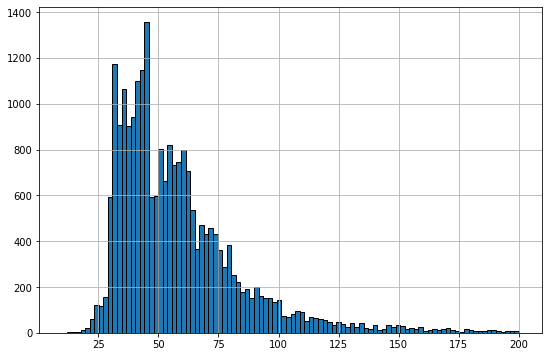

In [275]:
df['total_area'].hist(bins=100, range=(10, 200),figsize=(9,6),edgecolor='k')

Построим гистограмму цен объектов

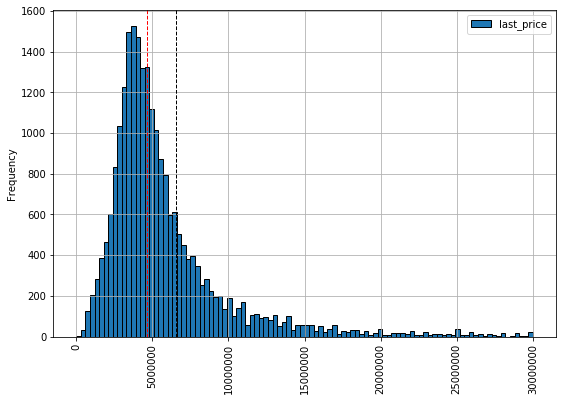

In [276]:
df.plot(y='last_price',kind='hist', bins=100, range=(0,30000000), grid=True,figsize=(9,6),edgecolor='k')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')
plt.axvline(df['last_price'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['last_price'].median(), color='r', linestyle='dashed', linewidth=1)

Построим гистограмму количества комнат

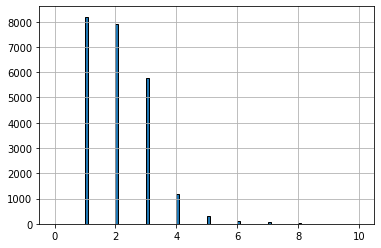

In [277]:
df['rooms'].hist(range=(0,10),edgecolor='k',bins=100)

Построим гистограмму высоты потолков

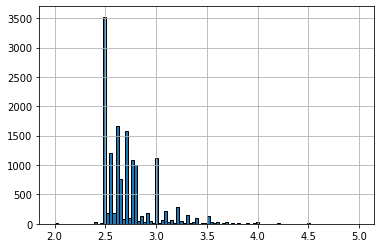

In [278]:
df['ceiling_height'].hist(range=(2,5),edgecolor='k',bins=100)

Построим гистограмму длительности продажи квартир и обозначим на графике среднее и медианные значения

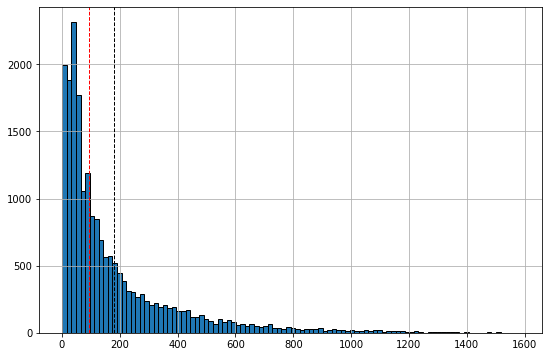

In [279]:
df['days_exposition'].hist(bins=100, figsize=(9,6),edgecolor='k')
plt.axvline(df['days_exposition'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['days_exposition'].median(), color='r', linestyle='dashed', linewidth=1)

In [280]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

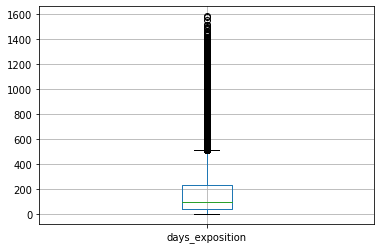

In [281]:
df.boxplot('days_exposition')

Медианное значение времени продажи квартир - 95 день, в то же время из-за длинного смещенного "хвоста", продаж длительностью 220 дней, среднее значение - 181 день. Межквартильный размах IQR=231-45=186, 1.5IQR=279.  Будем считать что непривычно длинные продажи начинаются за пределами "усов" - 279+231=510 дней. Быстрыми продажами можно считать продажи быстрее первого квартиля - 45 дней.

Уберем выбросы длительностью больше 510 дней

count    18721.000000
mean       128.299343
std        121.064671
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64


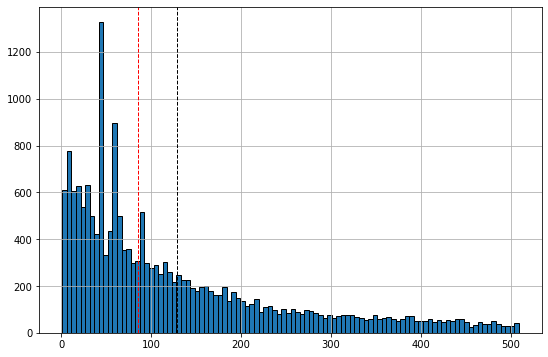

In [282]:
df = df[df['days_exposition']<510]
df['days_exposition'].hist(bins=100, figsize=(9,6),edgecolor='k')
plt.axvline(df['days_exposition'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['days_exposition'].median(), color='r', linestyle='dashed', linewidth=1)
print(df['days_exposition'].describe())

Стандартное отклонение уменьшилось почти в 2 раза. Значит выборка стала более "чистой" от выбросов.

Посмотрим на взаимосвязь данных. Будем использовать диаграммы рассеивания и коэфициент кореляции Пирсона.
Для определения силы кореляционной связи величин используем следующую таблицу:

-     менее 0.3 - слабая
- от 0.3 до 0.5 - умеренная
- от 0.5 до 0.7 - заметная
- от 0.7 до 0.9 - высокая
- более 0.9     - весьма высокая

0.629675368159187


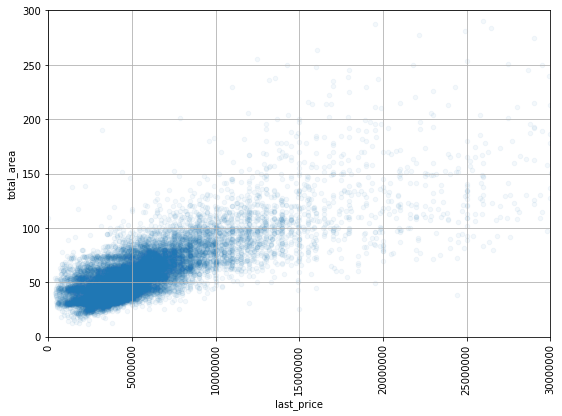

In [283]:
print(df['last_price'].corr(df['total_area']))
df.plot(x='last_price',y='total_area',kind='scatter',grid=True,figsize=(9,6),alpha=0.05, xlim=(0,30000000),ylim=(0,300))
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')

Кореляция цены и площади заметная. С увеличением площади стоимость квартиры растет.

0.3436405060645508


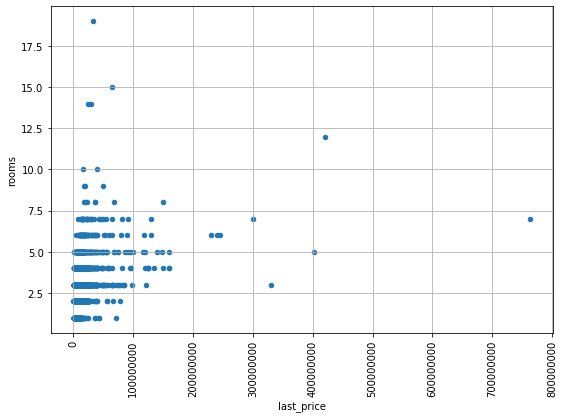

In [284]:
print(df['last_price'].corr(df['rooms']))
df.plot(x='last_price',y='rooms',kind='scatter',grid=True,figsize=(9,6))
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')

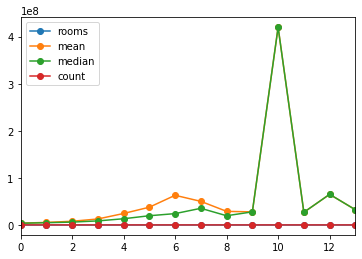

In [285]:
df_rooms = df.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median','count']).reset_index()
df_rooms.columns = ['rooms','mean','median','count']
df_rooms.plot(style='o-')

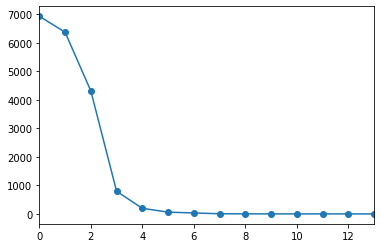

In [286]:
df_rooms['count'].plot(style='o-')

Кореляция цены и количества комнат умеренная. С увеличением площади стоимость квартиры растет. Больше всего предложений по двухкомнатным и однокомнатным квартирам.

-0.18289861901873025


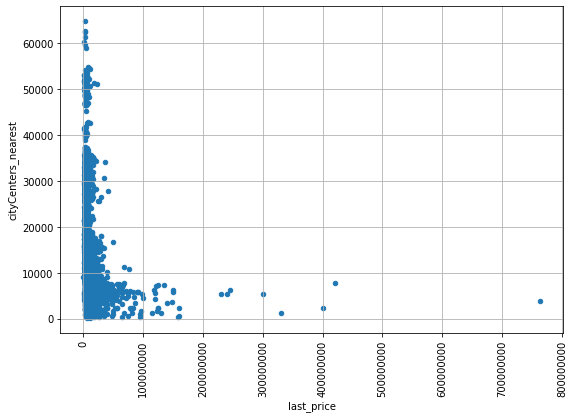

In [287]:
print(df['last_price'].corr(df['cityCenters_nearest']))
df.plot(x='last_price',y='cityCenters_nearest',kind='scatter',grid=True,figsize=(9,6))
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')

Кореляция близости квартиры к центру и стоимости - слабая.

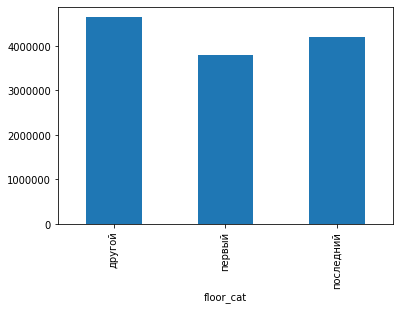

In [288]:
df_floor = df.groupby('floor_cat')['last_price'].median()
df_floor.plot.bar()

Медианная цена квартир на первом и последнем этажах - ниже.

In [289]:
df['weekday'] = df['first_day_exposition'].dt.weekday

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [290]:
df['month'] = df['first_day_exposition'].dt.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [291]:
df['year'] = df['first_day_exposition'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [292]:
df_weekday = df.groupby('weekday')['last_price'].median()
df_month = df.groupby('month')['last_price'].median()
df_year = df.groupby('year')['last_price'].median()

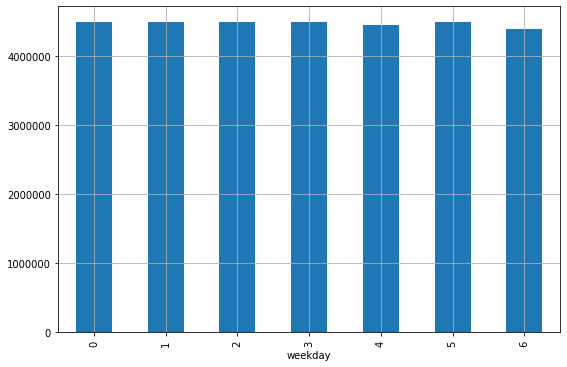

In [293]:
df_weekday.plot.bar(grid=True,figsize=(9,6))

Существенных отличий дня размещения объявления по стоимости объекта нет

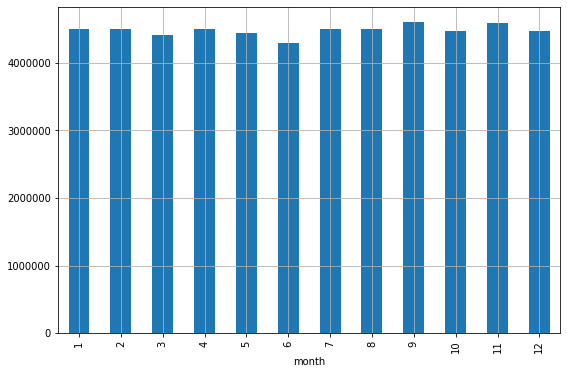

In [294]:
df_month.plot.bar(grid=True,figsize=(9,6))

Объявления размещенные в июне медианно имеют меньшую стоимость по отношению к другим месяцам размещения. А в сентебре - большую.

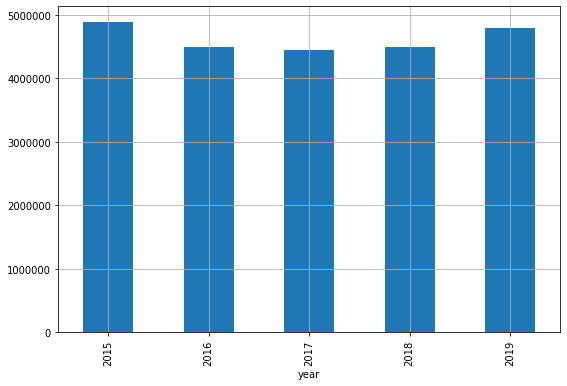

In [295]:
df_year.plot.bar(grid=True,figsize=(9,6))

Цены на недвижимость почти восстановились на уровень 2015 года.

In [296]:
df_top10 = df.pivot_table(index='locality_name',values='sqr_price', aggfunc=['count','mean'])

In [297]:
df_top10.columns = ['counts','mean_area_price']

In [298]:
df_top10 = df_top10.sort_values(by='counts',ascending=False).head(10).reset_index()

In [299]:
df_top10

,locality_name,counts,mean_area_price
0,санкт-петербург,12413,111769.835092
1,мурино,514,85908.538911
2,кудрово,405,94489.607407
3,шушары,387,77769.144703
4,всеволожск,308,68605.152597
5,колпино,294,74748.241497
6,парголово,288,89162.454861
7,пушкин,278,101894.179856
8,гатчина,244,68064.717213
9,выборг,193,57010.839378


In [300]:
df_top10['mean_area_price'].min()

57010.83937823834

In [301]:
df_top10['mean_area_price'].max()

111769.835092242

Выбрали 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах. Выделили населённые пункты с самой высокой (санкт-петербург) и низкой (выборг) стоимостью жилья

In [302]:
df_spb = df[df['locality_name'] == 'санкт-петербург'].reset_index(drop=True)
df_spb.head()
len(df_spb)/len(df)

0.6630521873831526

In [303]:
df_spb['cityCenters_km'] = (df_spb['cityCenters_nearest']/1000).round()

In [304]:
df_spb_center = df_spb.pivot_table(index='cityCenters_km', values='last_price',aggfunc='mean').reset_index()
df_spb_center.head()

,cityCenters_km,last_price
0,0.0,2.896125e+07
1,1.0,2.038053e+07
2,2.0,1.776372e+07
3,3.0,1.005487e+07
4,4.0,1.315981e+07


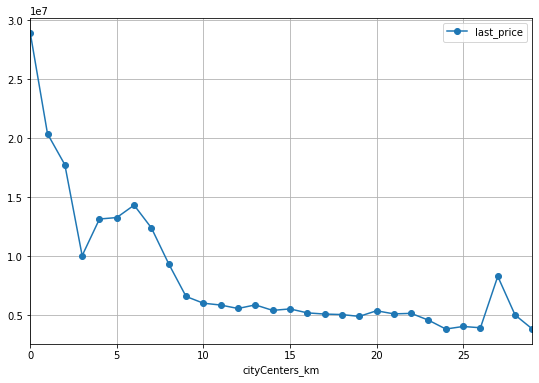

In [305]:
df_spb_center.plot(x='cityCenters_km', y='last_price', grid=True, figsize=(9,6), style='o-')

Наблюдается скачок цены объектов Санкт-Петербурга на значении меньше 9км до центра.
Отфильтруем квартиры в центре по этому условию

In [306]:
df_spb_center_9 = df_spb.query('cityCenters_km<9')

In [307]:
df_spb_center_9.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sqr_price', 'floor_cat',
       'living_to_total', 'kitchen_to_total', 'weekday', 'month', 'year',
       'cityCenters_km'],
      dtype='object')

2    956
3    901
1    539
4    337
5    136
Name: rooms, dtype: int64


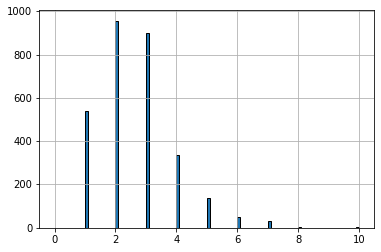

In [308]:
print(df_spb_center_9['rooms'].value_counts().sort_values(ascending=False).head())
display(df_spb_center_9['rooms'].hist(range=(0,10),edgecolor='k', bins=100))

В центре Санкт-Петербурга достаточно часто встречаются 3-х и 2-х комнатные квартиры

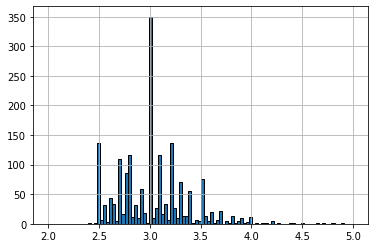

In [309]:
df_spb_center_9['ceiling_height'].hist(range=(2,5),edgecolor='k', bins=100)

В центре Санкт-Петербурга преобладают 3х-метровые потолки, в общей выборке преоблаждали потолки 2.5м

Цены в центре СПб
Средняя: 13198908.76803776
Медианная: 8300000.0

Цены по СЗ
Средняя: 6086057.374285562
Медианная: 4500000.0


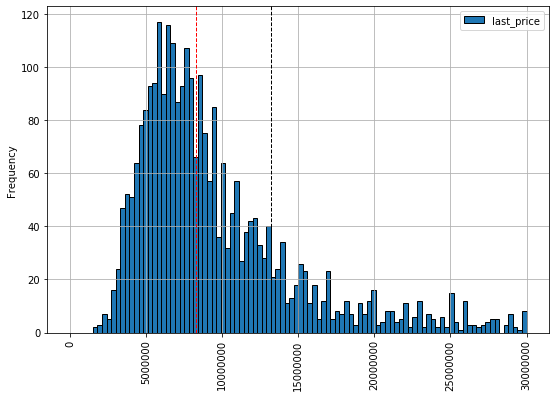

In [323]:
df_spb_center_9.plot(y='last_price',kind='hist', bins=100, range=(0,30000000), grid=True,figsize=(9,6),edgecolor='k')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')
plt.axvline(df_spb_center_9['last_price'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_spb_center_9['last_price'].median(), color='r', linestyle='dashed', linewidth=1)
print('Цены в центре СПб')
print(f'Средняя: {df_spb_center_9["last_price"].mean()}')
print(f'Медианная: {df_spb_center_9["last_price"].median()}')
print('\nЦены по СЗ')
print(f'Средняя: {df["last_price"].mean()}')
print(f'Медианная: {df["last_price"].median()}')

Медианная и средняя стоимости квартир в центре спб значительно выше чем в общем датафрейме

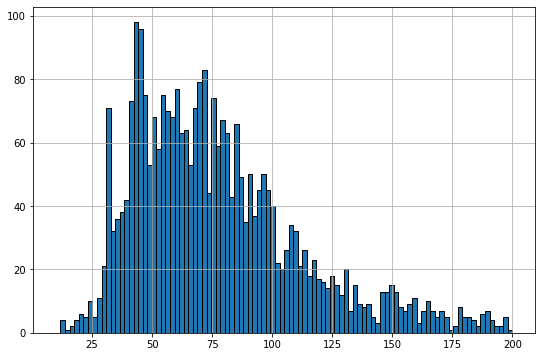

In [311]:
df_spb_center_9['total_area'].hist(bins=100, range=(10, 200),figsize=(9,6),edgecolor='k')

На гистограмме общей площади квартир два пика: на 40 и на 70, и в диапазоне этих значений довольно высокая частота

0.6338804759593758


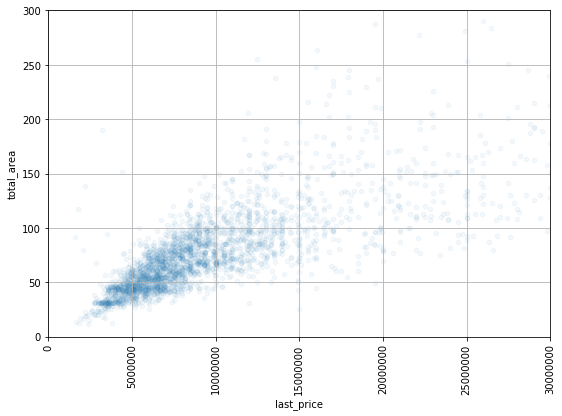

In [312]:
print(df_spb_center_9['last_price'].corr(df_spb_center_9['total_area']))
df_spb_center_9.plot(x='last_price',y='total_area',kind='scatter',grid=True,figsize=(9,6),alpha=0.05, xlim=(0,30000000),ylim=(0,300))
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')

Кореляция между значениями стоимости и площадью квартир практически такая же как и во всей выборке

0.34638595236011865


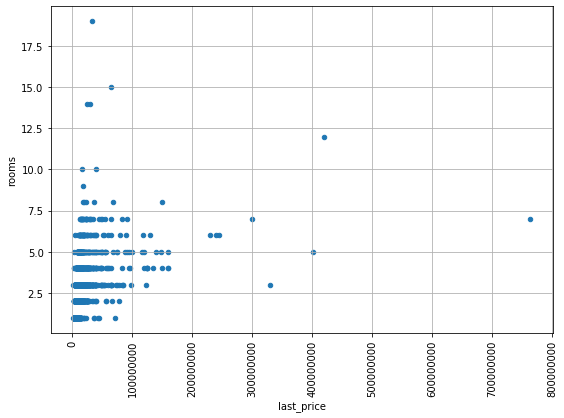

In [313]:
print(df_spb_center_9['last_price'].corr(df_spb_center_9['rooms']))
df_spb_center_9.plot(x='last_price',y='rooms',kind='scatter',grid=True,figsize=(9,6))
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')

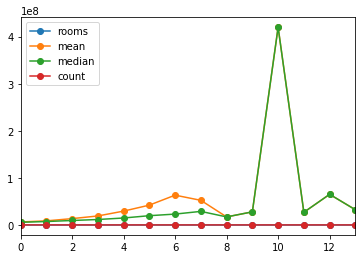

In [314]:
df_rooms_spb = df_spb_center_9.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median','count']).reset_index()
df_rooms_spb.columns = ['rooms','mean','median','count']
df_rooms_spb.plot(style='o-')

Кореляция стоимости и комнатности практически такая же как в общей выборке

-0.07941818563308937


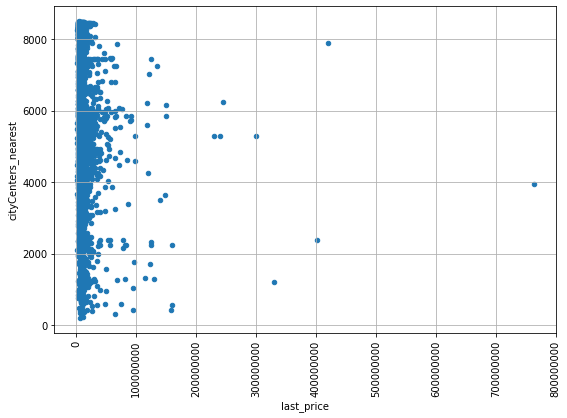

In [315]:
print(df_spb_center_9['last_price'].corr(df_spb_center_9['cityCenters_nearest']))
df_spb_center_9.plot(x='last_price',y='cityCenters_nearest',kind='scatter',grid=True,figsize=(9,6))
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')

Кореляция стоимости и близости к центру слабая. Стоимость квадратного метра в центре практически не меняется

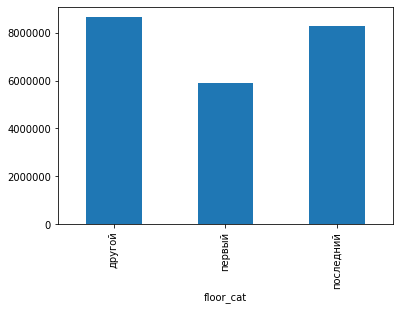

In [316]:
df_floor_spb = df_spb_center_9.groupby('floor_cat')['last_price'].median()
df_floor_spb.plot.bar()

Стоимость квартир на последнем этаже в центре Спб сопоставима с другими этажами

In [317]:
df_weekday_spb = df_spb_center_9.groupby('weekday')['last_price'].median()
df_month_spb = df_spb_center_9.groupby('month')['last_price'].median()
df_year_spb = df_spb_center_9.groupby('year')['last_price'].median()

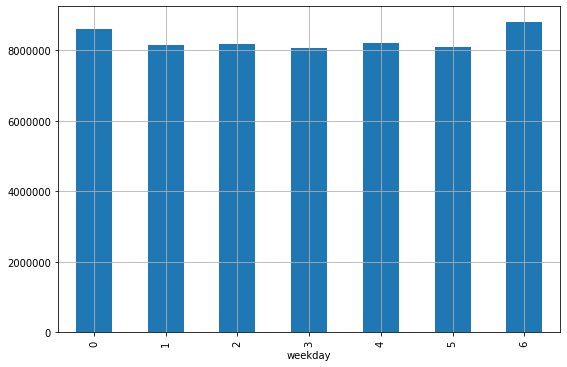

In [318]:
df_weekday_spb.plot.bar(grid=True,figsize=(9,6))

Выделяется стоимость объектов, размещеных в понедельник и воскресение

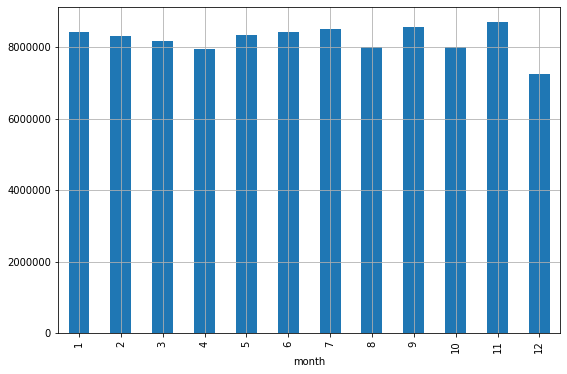

In [319]:
df_month_spb.plot.bar(grid=True,figsize=(9,6))

На столбчатой диаграмме заметно, что стоимость декабрьских объявлений - минимальная

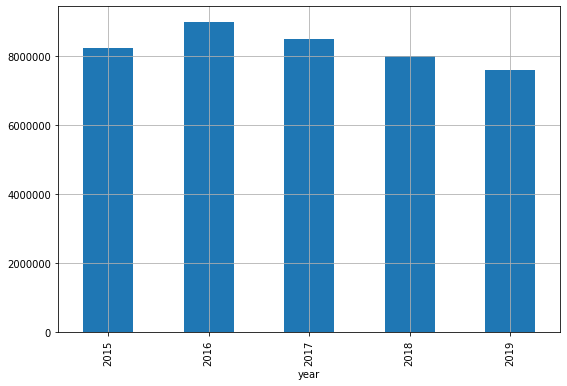

In [320]:
df_year_spb.plot.bar(grid=True,figsize=(9,6))

Стоимость квартир в центре Спб снижается с 2016 года

## Общий вывод

По результатам анализа стоимости объектов жилой недвижимости в Санкт-Петербурге и соседних населённых пунктах отдельно были выполнены:
- предобработка данных (найдены и устранены пропуски, где необходимо изменены типы данных, выделены необходимые категории)
- добавлены дополнительные расчетные столбцы
- исследовательский анализ всего датафрейма
- исследовательский анализ объектов размещенных в центре Санкт-Петербурга

На основе анализа распределения длительности продажи квартир были выделены и удалены выбросы.

В результате проведенной работы были определены следующие факторы влияющий на изменение стоимости квартир в порядке уменьшения:
- площадь
- количество комнат
- близость к центру
- этаж
- время размещения объявления

Объекты размещенные в центре Санкт-Петербурга в среднем имеют большую площадь, более высокие потолки и большую комнатность, значительно большую стоимость квадратного метра.
Закономерности выявленные при анализе факторов влияющих на стоимость квартир всего датафрейма в целом прослеживаются в объектах центра Санкт-Петербурга.